# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Data Loading 

In [2]:
data=pd.read_csv("creditcard.csv")

# Exploratory Data Analysis

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

Fraud Cases: 492
Valid Transactions: 284315


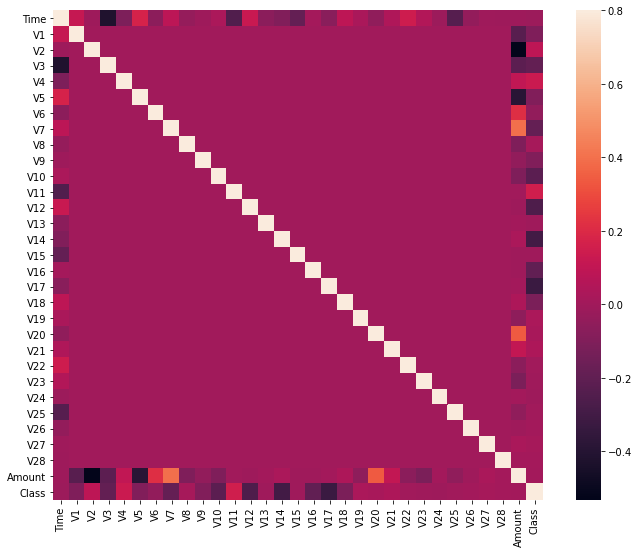

In [7]:
#plotting the correlation matrix
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In [8]:
100 * (data.isnull().sum()/len(data)).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

Duplicate check

In [9]:
data_d=data.copy()
data_d.drop_duplicates(subset=None, inplace=True)

In [10]:
print(data.shape,data_d.shape)

(284807, 31) (283726, 31)


In [11]:
data=data_d
data.shape

(283726, 31)

Histogram for all features

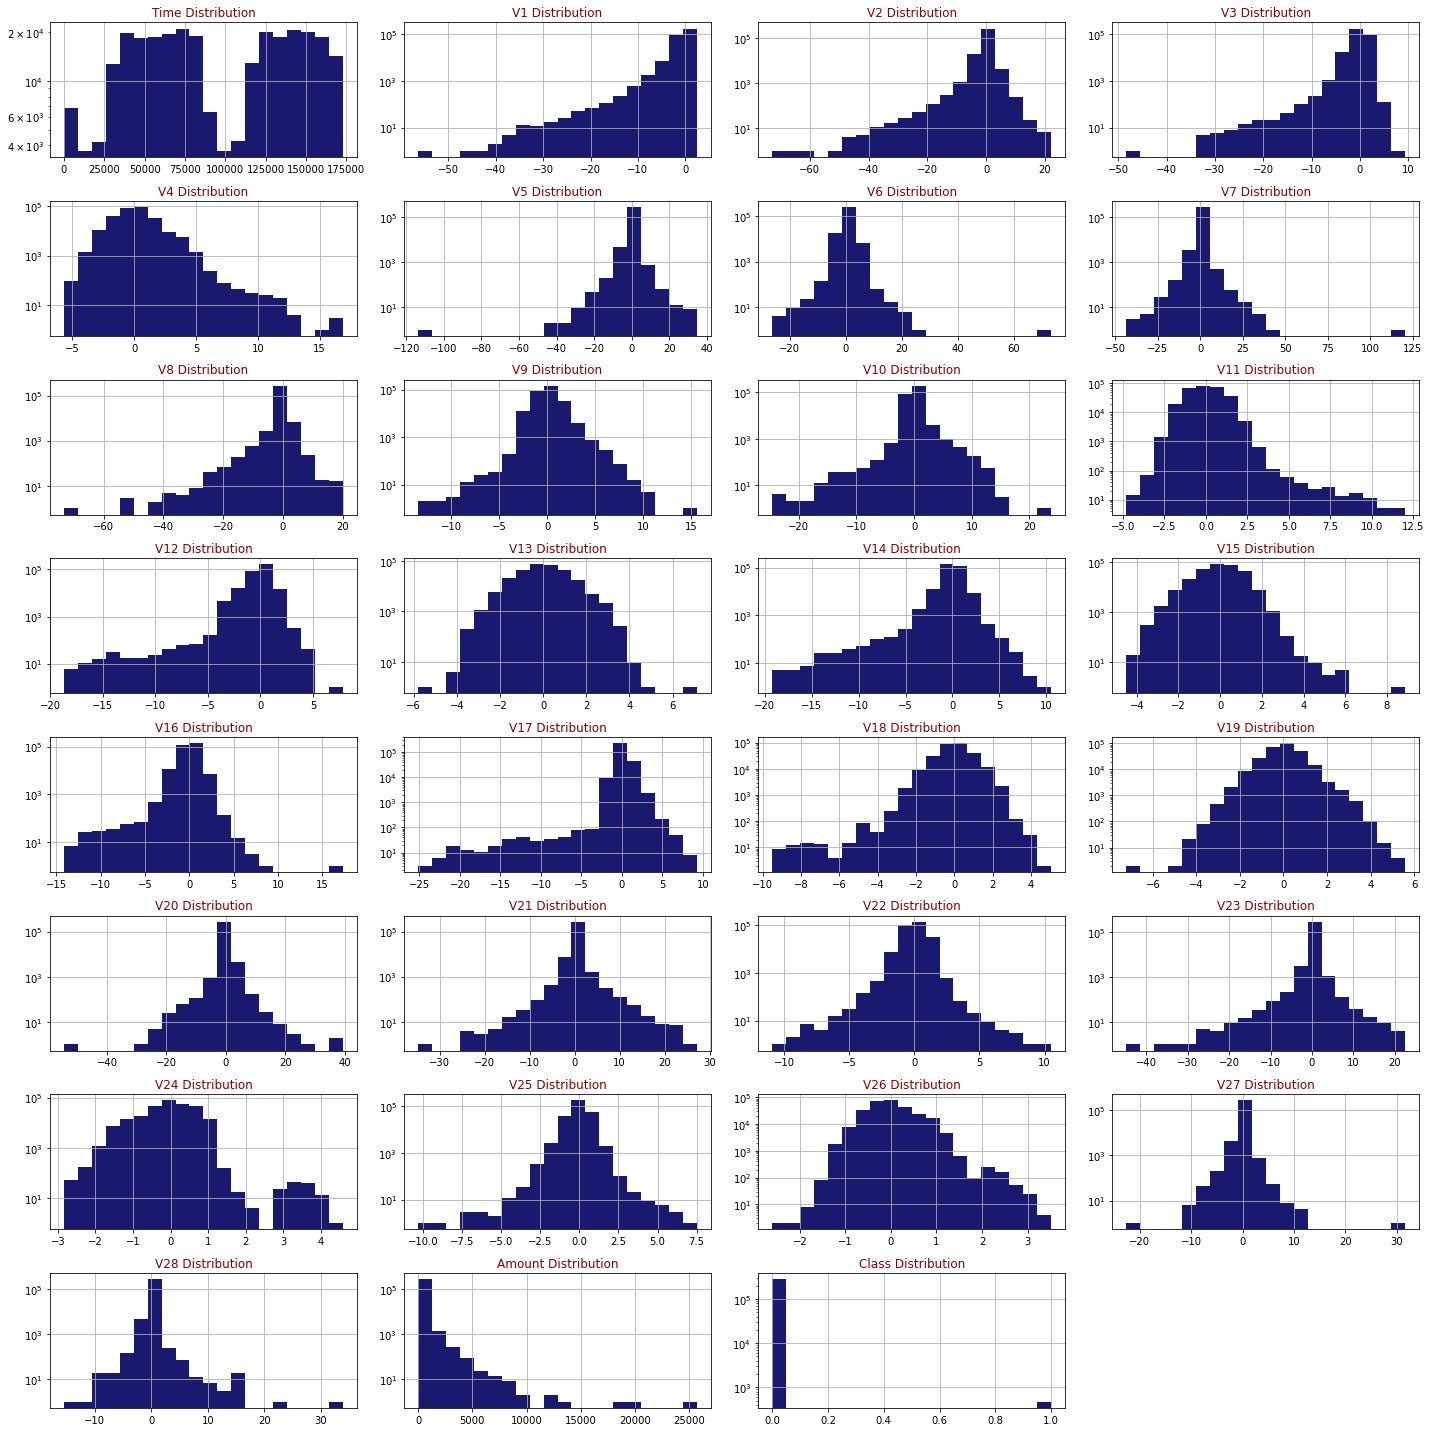

In [12]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,8,4)

# Data distribution visualization by PCA

*REAL DATA*

In [13]:
from sklearn.decomposition import PCA

In [14]:
X_data = data.drop(['Class','Time'], axis = 1) 
y_data= data["Class"] 

In [15]:
X_valid = valid.drop(['Class','Time'], axis = 1)
X_fraud = fraud.drop(['Class','Time'], axis = 1) 

In [16]:
pca_model = PCA(n_components=2)
pca_model.fit(X_data)

PCA(n_components=2)

Text(0, 0.5, 'Second Principal Component')

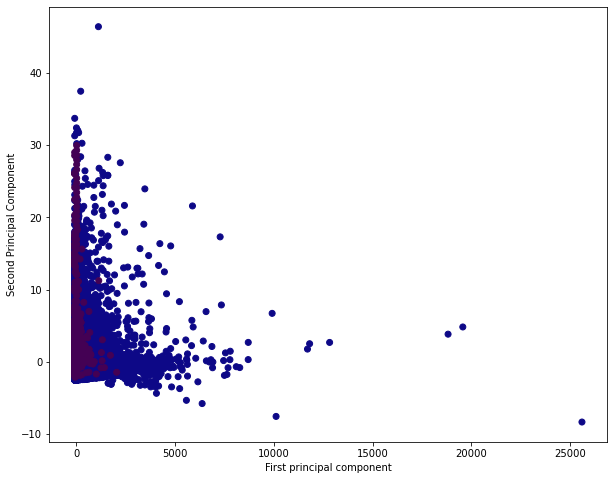

In [17]:
valid_pca = pca_model.transform(X_valid)
plt.figure(figsize=(10,8))
plt.scatter(valid_pca[:,0],valid_pca[:,1],c=valid['Class'],cmap='plasma')
fraud_pca = pca_model.transform(X_fraud)
plt.scatter(fraud_pca[:,0],fraud_pca[:,1],c=fraud['Class'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

*Scaled Data*

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_data)

StandardScaler()

In [19]:
scaled_X_data=scaler.transform(X_data)
scaled_X_valid=scaler.transform(X_valid)
scaled_X_fraud=scaler.transform(X_fraud)

In [20]:
pca_model = PCA(n_components=2)
pca_model.fit(scaled_X_data)

PCA(n_components=2)

In [21]:
scaled_X_data.shape

(283726, 29)

Text(0, 0.5, 'Second Principal Component')

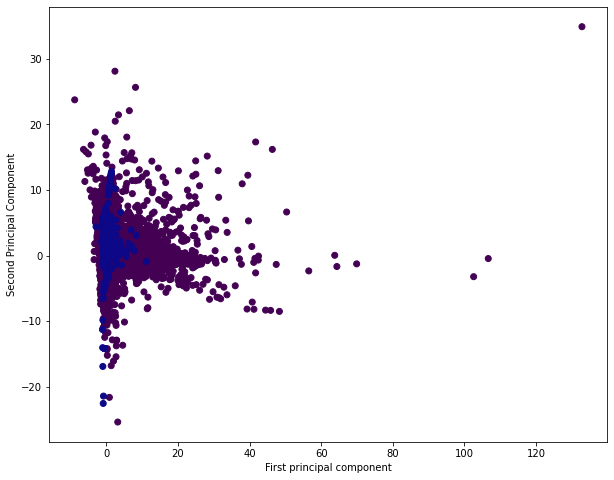

In [22]:
scaled_valid_pca = pca_model.transform(scaled_X_valid)
plt.figure(figsize=(10,8))
plt.scatter(scaled_valid_pca[:,0],scaled_valid_pca[:,1],c=valid['Class'])
scaled_fraud_pca = pca_model.transform(scaled_X_fraud)
plt.scatter(scaled_fraud_pca[:,0],scaled_fraud_pca[:,1],c=fraud['Class'],cmap="plasma")
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [23]:
df_comp = pd.DataFrame(pca_model.components_,columns=X_data.columns)

In [24]:
df_comp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.170751,-0.390969,-0.156771,0.073252,-0.284663,0.158396,0.297114,-0.078758,-0.032142,-0.076229,...,0.251044,0.080654,-0.047141,-0.080197,0.002368,-0.034600,-0.002499,0.020444,0.007531,0.705408
1,-0.357083,0.045846,-0.148840,0.038959,0.168417,-0.037081,0.061074,0.287092,-0.019367,0.343231,...,-0.014451,-0.028750,-0.167353,-0.071628,-0.167621,-0.032366,-0.036563,0.578038,-0.086983,0.000684


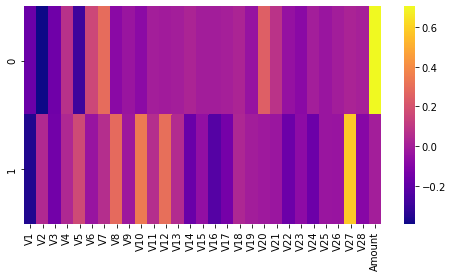

In [25]:
plt.figure(figsize=(8,4))
sns.heatmap(df_comp,cmap='plasma',)

# Machine Learning Model

In [26]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score

In [27]:
def metrics(y,y_hat):
    print("The accuracy is {}".format(accuracy_score(y,y_hat)))
    print("The precision is {}".format(precision_score(y,y_hat)))
    print("The recall is {}".format(recall_score(y,y_hat)))
    print("The F1-Score is {}".format(f1_score(y,y_hat))) 
    print("confusion maxtrix is \n{}".format(confusion_matrix(y,y_hat)))

In [28]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.2, random_state=42)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [31]:
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [32]:
logmodel=LogisticRegression(C=0.1,max_iter=1000)

In [33]:
logmodel.fit(scaled_X_train,y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [34]:
train_Pred=logmodel.predict(scaled_X_train)
test_Pred=logmodel.predict(scaled_X_test)

In [35]:
print("training matrics is ")
metrics(y_train,train_Pred)
print("Area under Precision Recall Curve is  {}".format(average_precision_score(y_train,logmodel.predict_proba(scaled_X_train)[:,1])))

training matrics is 
The accuracy is 0.9991937615648956
The precision is 0.8676470588235294
The recall is 0.6161879895561357
The F1-Score is 0.7206106870229008
confusion maxtrix is 
[[226561     36]
 [   147    236]]
Area under Precision Recall Curve is  0.7600812176436402


In [36]:
print("test matrics are ")
metrics(y_test,test_Pred)
print("area under precision recall curve :{}".format(average_precision_score(y_test,logmodel.predict_proba(scaler.transform(X_test))[:,1]) ))

test matrics are 
The accuracy is 0.9991365030134283
The precision is 0.8867924528301887
The recall is 0.5222222222222223
The F1-Score is 0.6573426573426574
confusion maxtrix is 
[[56650     6]
 [   43    47]]
area under precision recall curve :0.7067843629748436


In [37]:
param_grid = {'C': [0.01,0.1,1], 'max_iter': [500,1000,2000]} 

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=3,scoring="average_precision")

In [40]:
grid.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.01, max_iter=500 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.01, max_iter=500, score=0.769, total=   0.7s
[CV] C=0.01, max_iter=500 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ................ C=0.01, max_iter=500, score=0.612, total=   0.6s
[CV] C=0.01, max_iter=500 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ................ C=0.01, max_iter=500, score=0.799, total=   0.6s
[CV] C=0.01, max_iter=500 ............................................
[CV] ................ C=0.01, max_iter=500, score=0.796, total=   0.6s
[CV] C=0.01, max_iter=500 ............................................
[CV] ................ C=0.01, max_iter=500, score=0.747, total=   0.6s
[CV] C=0.01, max_iter=1000 ...........................................
[CV] ............... C=0.01, max_iter=1000, score=0.769, total=   0.7s
[CV] C=0.01, max_iter=1000 ...........................................
[CV] ............... C=0.01, max_iter=1000, score=0.612, total=   0.5s
[CV] C=0.01, max_iter=1000 ...........................................
[CV] ............... C=0.01, max_iter=1000, score=0.799, total=   1.2s
[CV] C=0.01, max_iter=1000 ...........................................
[CV] ............... C=0.01, max_iter=1000, score=0.796, total=   0.6s
[CV] C=0.01, max_iter=1000 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   40.7s finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [500, 1000, 2000]},
             scoring='average_precision', verbose=3)

In [41]:
grid_train_pred= grid.predict(scaled_X_train)
grid_test_pred=grid.predict(scaled_X_test)

In [42]:
print("training matrics is ")
metrics(y_train,grid_train_pred)
print("Area under Precision Recall Curve is  {}".format(average_precision_score(y_train,grid.predict_proba(scaled_X_train)[:,1])))

training matrics is 
The accuracy is 0.9991937615648956
The precision is 0.8676470588235294
The recall is 0.6161879895561357
The F1-Score is 0.7206106870229008
confusion maxtrix is 
[[226561     36]
 [   147    236]]
Area under Precision Recall Curve is  0.7608406845647417


In [44]:
print("test matrics are ")
metrics(y_test,grid_test_pred)
print("area under precision recall curve :{}".format(average_precision_score(y_test,grid.predict_proba(scaler.transform(X_test))[:,1]) ))

test matrics are 
The accuracy is 0.9991717477883904
The precision is 0.8909090909090909
The recall is 0.5444444444444444
The F1-Score is 0.6758620689655171
confusion maxtrix is 
[[56650     6]
 [   41    49]]
area under precision recall curve :0.7051410171608034


# Support Vector Machine

In [45]:
from sklearn.svm import SVC

In [46]:
model = SVC(C=10)

In [47]:
model.fit(X_train,y_train)

SVC(C=10)

In [48]:
pred_train = model.predict(X_train)
pred_test=model.predict(X_test)

In [53]:
print("training matrics is ")
metrics(y_train,pred_train)
print("area under precision recall curve :{}".format(average_precision_score(y_train,model.decision_function((X_train))) ))

training matrics is 
The accuracy is 0.9993083091021235
The precision is 0.8553459119496856
The recall is 0.7101827676240209
The F1-Score is 0.776034236804565
confusion maxtrix is 
[[226551     46]
 [   111    272]]
area under precision recall curve :0.7471395702629672


In [52]:
print("test matrics is ")
metrics(y_test,pred_test)
print("area under precision recall curve :{}".format(average_precision_score(y_test,model.decision_function((X_test))) ))

test matrics is 
The accuracy is 0.9992598597257957
The precision is 0.9
The recall is 0.6
The F1-Score is 0.7200000000000001
confusion maxtrix is 
[[56650     6]
 [   36    54]]
area under precision recall curve :0.6998049002843968


# Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
pred_train_rfc=rfc.predict(X_train)
pred_test_rfc=rfc.predict(X_test)

In [57]:
print("training matrics is ")
metrics(y_train,pred_train_rfc)
print("Area under Precision Recall Curve is  {}".format(average_precision_score(y_train,rfc.predict_proba(X_train)[:,1])))

training matrics is 
The accuracy is 1.0
The precision is 1.0
The recall is 1.0
The F1-Score is 1.0
confusion maxtrix is 
[[226597      0]
 [     0    383]]
Area under Precision Recall Curve is  1.0


In [58]:
print("test matrics are ")
metrics(y_test,pred_test_rfc)
print("area under precision recall curve :{}".format(average_precision_score(y_test,rfc.predict_proba(X_test)[:,1]) ))

test matrics are 
The accuracy is 0.9995065731505305
The precision is 0.9558823529411765
The recall is 0.7222222222222222
The F1-Score is 0.8227848101265822
confusion maxtrix is 
[[56653     3]
 [   25    65]]
area under precision recall curve :0.8126189626439503


In [59]:
parameters = {
    "n_estimators":[100,250],
    "max_depth":[8,16,32]
    
}

In [61]:
cv = GridSearchCV(rfc,parameters,cv=3)


In [62]:
cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 16, 32], 'n_estimators': [100, 250]})

In [65]:
cv_pred_train=cv.predict(X_train)
cv_pred_test=cv.predict(X_test)

In [66]:
print("training matrics is ")
metrics(y_train,cv_pred_train)
print("Area under Precision Recall Curve is  {}".format(average_precision_score(y_train,cv.predict_proba(X_train)[:,1])))

training matrics is 
The accuracy is 0.999810555996123
The precision is 1.0
The recall is 0.8877284595300261
The F1-Score is 0.9405255878284924
confusion maxtrix is 
[[226597      0]
 [    43    340]]
Area under Precision Recall Curve is  0.9973527796712942


In [68]:
print("test matrics is ")
metrics(y_test,cv_pred_test)
print("Area under Precision Recall Curve is  {}".format(average_precision_score(y_test,cv.predict_proba(X_test)[:,1])))

test matrics is 
The accuracy is 0.9995594403129736
The precision is 0.9850746268656716
The recall is 0.7333333333333333
The F1-Score is 0.8407643312101911
confusion maxtrix is 
[[56655     1]
 [   24    66]]
Area under Precision Recall Curve is  0.8161187838625048
